In [25]:
# All imports
import pandas as pd
import tensorflow as tf
from make_dataset_deep import make_filepaths_labels, train_test_split_deep # Importing the py file for creating the tensors with features
from create_model_deep import create_model_CNNRNN_regularized # Importing the function for creating the CNN+RNN model
from train_model_deep import train_model_deep # Importing the function for training the model
from predict_model_deep import model_load_predict # Importing the function to load and get model predictions
from visualisations_deep_models import print_evaluation_metrics, visualize_confusion_matrix, visualize_saliency_map # Importing the functions for evaluation

In [8]:
# Reading and printing the top 5 rows of the metadata file
metadata_path = '/content/drive/MyDrive/Bird_Sounds/bird_songs_metadata.csv' # Please the path to the metadata file here
metadata = pd.read_csv(metadata_path)
metadata.head()

,id,genus,species,subspecies,name,recordist,country,location,latitude,longitude,altitude,sound_type,source_url,license,time,date,remarks,filename
0,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-0.wav
1,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-1.wav
2,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-4.wav
3,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-5.wav
4,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-6.wav


In [12]:
audio_path = '/content/drive/MyDrive/Bird_Sounds/wavfiles/' # Please enter the path to the wav files here
# Storing the filepaths and the corresponding labels in a list forming the X and y variables respectively.
file_paths, labels = make_filepaths_labels(metadata_path, audio_path)
# Creating the training and testing data using the MelSpectrogram as the features
dataset_train, dataset_test = train_test_split_deep(file_paths, labels, 'MelSpectrogram')
# Verifying the shape of input data
for batch in dataset_train.take(1):
      input_data_shape = batch[0].shape
      print("Shape of the input data:", input_data_shape)

Shape of the input data: (64, 1026, 128)


In [17]:
# Calling the function that creates the model
model = create_model_CNNRNN_regularized()
# Print the architecture
print(model.summary())

Model: "Bird_audio_classification_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 0_Input_shape (InputLayer)  [(None, 1026, 128)]          0         []                            
                                                                                                  
 1_Conv1D (Conv1D)           (None, 513, 64)              65600     ['0_Input_shape[0][0]']       
                                                                                                  
 2_SpatialDropout1D (Spatia  (None, 513, 64)              0         ['1_Conv1D[0][0]']            
 lDropout1D)                                                                                      
                                                                                                  
 3_Conv1d (Conv1D)           (None, 257, 64)              32832     

In [21]:
# Train the model
model_eval = train_model_deep(model, 120, dataset_train, dataset_test)
# Print the model's final loss and accuracy
print(model_eval.evaluate(dataset_test, return_dict=True))

Epoch 1/120
67/67 [==============================] - ETA: 0s - loss: 3.0325 - sparse_categorical_accuracy: 0.4799

67/67 [==============================] - 316s 5s/step - loss: 3.0325 - sparse_categorical_accuracy: 0.4799 - val_loss: 2.1353 - val_sparse_categorical_accuracy: 0.5771
Epoch 2/120
67/67 [==============================] - ETA: 0s - loss: 1.6820 - sparse_categorical_accuracy: 0.6812

67/67 [==============================] - 26s 397ms/step - loss: 1.6820 - sparse_categorical_accuracy: 0.6812 - val_loss: 1.3147 - val_sparse_categorical_accuracy: 0.7344
Epoch 3/120
67/67 [==============================] - 26s 386ms/step - loss: 1.1397 - sparse_categorical_accuracy: 0.7467 - val_loss: 0.9529 - val_sparse_categorical_accuracy: 0.7773
Epoch 4/120
67/67 [==============================] - 27s 404ms/step - loss: 0.8623 - sparse_categorical_accuracy: 0.7964 - val_loss: 0.7756 - val_sparse_categorical_accuracy: 0.8135
Epoch 5/120
67/67 [==============================] - 26s 395ms/step - loss: 0.7400 - sparse_categorical_accuracy: 0.8209 - val_loss: 0.6307 - val_sparse_categorical_accuracy: 0.8506
Epoch 6/120
67/67 [==============================] - 19s 278ms/step - loss: 0.6395 - sparse_categorical_accuracy: 0.8389 - val_loss: 0.5634 - val_sparse_categorical_accuracy: 0.8467
Epoch 7/120
67/67 [==============================] - 27s 400ms/step - loss: 0.5567 - sparse_categorica

In [22]:
model_path = '/content/model_checkpoint/model' # Please enter the path to the model here which got saved during the training
# Loading the trained model and getting the probabilities, predictions and the true labels
y_prob, y_pred, y_true = model_load_predict(model_path, dataset_test)
# Printing the evaluation metrics
print_evaluation_metrics(y_true, y_pred, y_prob)


16/16 [==============================] - 4s 178ms/step - loss: 0.1715 - sparse_categorical_accuracy: 0.9648
{'loss': 0.17147018015384674, 'sparse_categorical_accuracy': 0.96484375}
16/16 [==============================] - 4s 179ms/step
F1: 0.9651965778653413 | Precision: 0.9650041710495 | Recall: 0.9654127905784918 | AUC: 0.9978992811051273


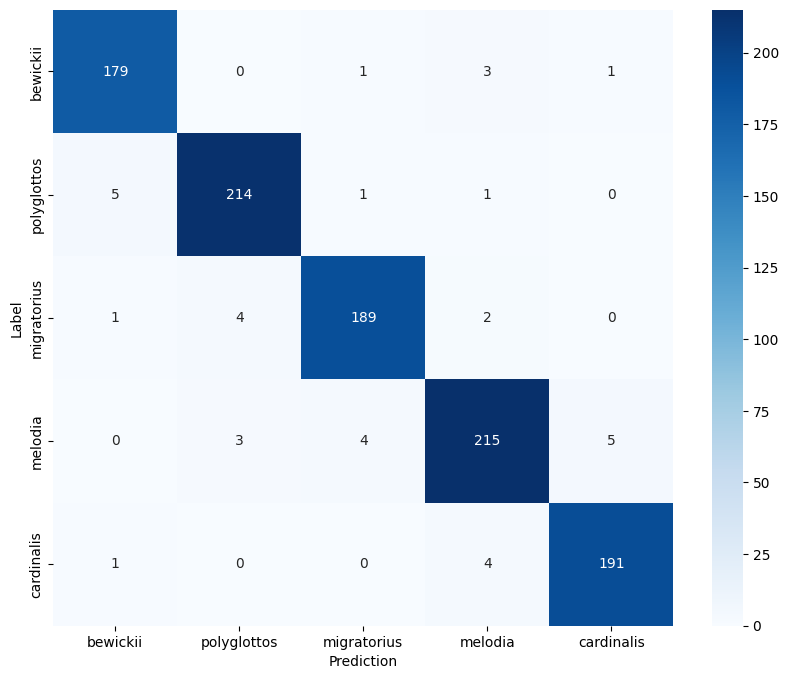

In [23]:
# Visualising the confusion matrix
visualize_confusion_matrix(y_true, y_pred)

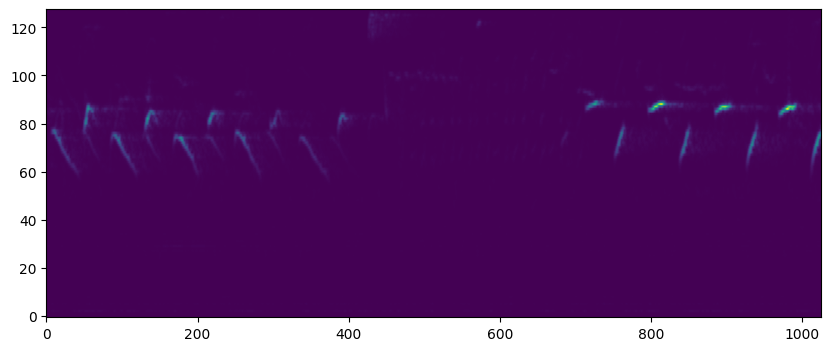

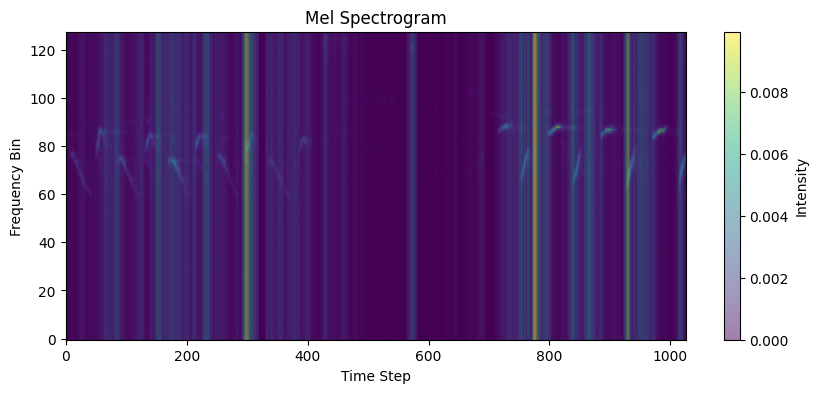

In [28]:
# Visualising the model interpretation
visualize_saliency_map(tf.keras.models.load_model(model_path), dataset_test, [15])